## Your First Machine Learning Project in Python Step-By-Step

## Iris dataset

In [1]:
# 셀 1: 필수 라이브러리 임포트
import sys
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn

# 버전 정보 출력으로 설치 확인
print('Python:', sys.version)
print('scipy :', scipy.__version__)
print('numpy :', np.__version__)
print('matplotlib :', matplotlib.__version__)
print('pandas :', pd.__version__)
print('sklearn :', sklearn.__version__)


Python: 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]
scipy : 1.5.2
numpy : 1.21.6
matplotlib : 3.3.2
pandas : 1.1.5
sklearn : 0.23.2


In [2]:
# 셀 2: 데이터 로드 및 기본 조회
from pandas import read_csv

# 데이터 URL 및 컬럼명 지정
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# 데이터 로드
dataset = read_csv(url, names=column_names)

# 데이터 크기 및 샘플 출력
print("데이터셋 크기:", dataset.shape)      # (150, 5)
dataset.head(10)


데이터셋 크기: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Iris 데이터셋을 UCI 저장소에서 직접 불러와 pandas DataFrame으로 저장한 뒤, 크기와 앞부분을 조회합니다.

데이터 로드 방식 확인

인스턴스(행) 수와 속성(열) 수 확인

샘플 데이터를 직접 눈으로 확인

In [3]:
# 셀 3: 기술 통계 및 클래스 분포
# 3.1 기술 통계
print(dataset.describe())

# 3.2 클래스별 개수
print("\n클래스 분포:\n", dataset['class'].value_counts())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

클래스 분포:
 Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64


데이터의 통계 요약과 클래스별 인스턴스 수를 계산합니다.

describe()로 평균, 표준편차, 최소/최대, 사분위수 파악

클래스(품종)별 균형 여부 확인 (각 50개씩)

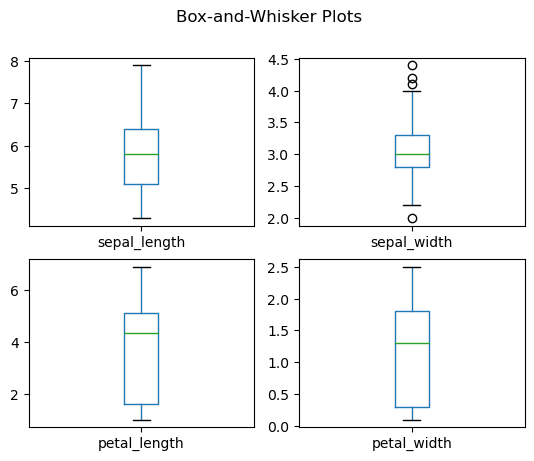

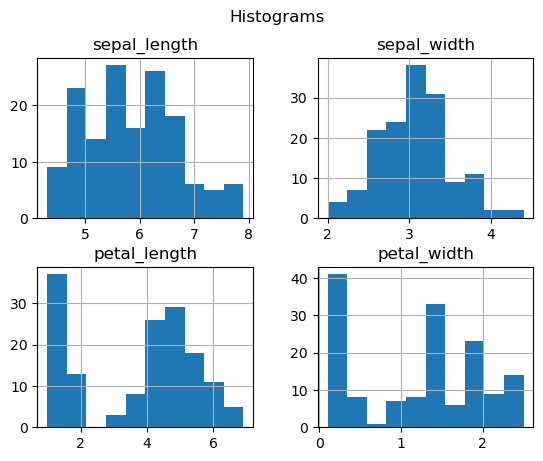

In [4]:
# 셀 4: 단변량 시각화
import matplotlib.pyplot as plt

# 4.1 박스플롯
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.suptitle('Box-and-Whisker Plots')
plt.show()

# 4.2 히스토그램
dataset.hist()
plt.suptitle('Histograms')
plt.show()


각 수치형 속성에 대해 박스플롯과 히스토그램을 생성하여 분포 형태를 시각적으로 탐색합니다.

속성별 분포 범위와 이상치 여부 확인

히스토그램으로 데이터의 분포 형태(정규성 등) 탐색

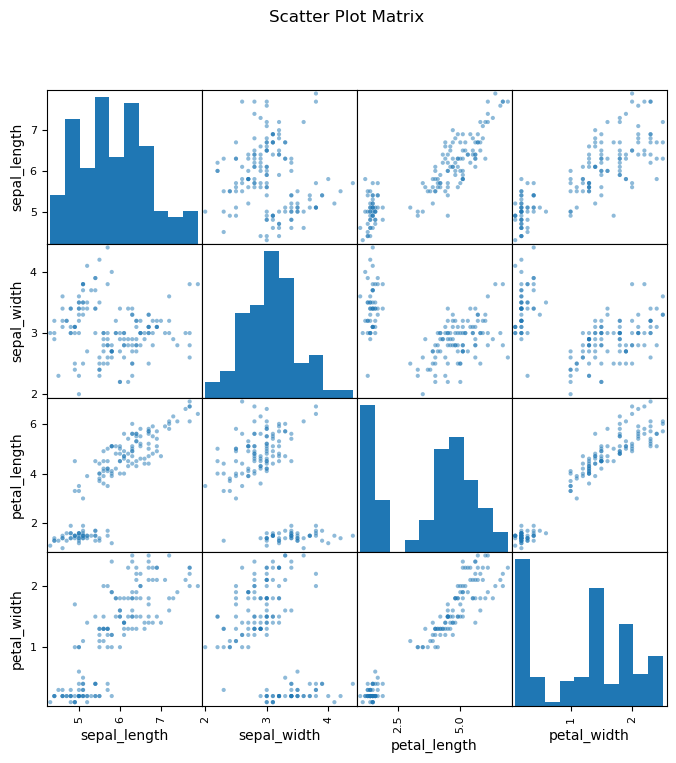

In [5]:
# 셀 5: 다변량 시각화
from pandas.plotting import scatter_matrix

scatter_matrix(dataset, figsize=(8,8), diagonal='hist')
plt.suptitle('Scatter Plot Matrix')
plt.show()


속성 간 상관 관계와 군집 구조를 파악하기 위해 산점도 행렬(Scatter Matrix)을 작성합니다.

속성 쌍별 관계 확인 (예: petal_length vs petal_width)

클래스 구분이 가능한 축 파악

In [6]:
# 셀 6: 데이터 분리
from sklearn.model_selection import train_test_split

# 특징 행렬 X, 레이블 벡터 y 정의
array = dataset.values
X, y = array[:,0:4], array[:,4]

# 80:20 분할 (난수 시드 고정)
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.20, random_state=1, shuffle=True)

print("학습 데이터 크기:", X_train.shape, y_train.shape)
print("검증 데이터 크기:", X_validation.shape, y_validation.shape)


학습 데이터 크기: (120, 4) (120,)
검증 데이터 크기: (30, 4) (30,)


데이터를 80% 학습용, 20% 검증용으로 분리해 두고, 이후 모델 평가에 사용합니다.

모델 선택과 하이퍼파라미터 튜닝 단계(교차검증)와

최종 성능 평가 단계(홀드아웃 검증)를 엄격히 분리

In [7]:
# 셀 7: 모델 교차검증 비교
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 모델 목록 정의
models = [
    ('LR',  LogisticRegression(solver='liblinear', multi_class='ovr')),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART',DecisionTreeClassifier()),
    ('NB',  GaussianNB()),
    ('SVM', SVC(gamma='auto'))
]

results, names = [], []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_scores = cross_val_score(model, X_train, y_train,
                                cv=kfold, scoring='accuracy')
    results.append(cv_scores)
    names.append(name)
    print(f"{name}: {cv_scores.mean():.6f} ({cv_scores.std():.6f})")


LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


6가지 기본 머신러닝 알고리즘에 대해 10-겹 교차검증을 수행하고 평균 정확도 및 표준편차를 출력합니다.

**StratifiedKFold**은 분류 문제에서 각 폴드(fold)마다 클래스 비율을 원본 데이터와 동일하게 유지하도록 데이터를 나누는 교차검증 기법입니다. 이렇게 하면 불균형한 클래스 분포 문제를 완화할 수 있습니다.

**cross_val_score**는 주어진 분류기(estimator)에 대해 지정한 교차검증 전략(기본적으로 이진/다중 분류면 StratifiedKFold 사용)을 적용하고, 각 폴드에서 모델 성능 점수를 계산해 반환하는 함수입니다. 즉, StratifiedKFold는 교차검증 분할자(splitter)이고, cross_val_score는 이 분할자를 이용해 자동으로 학습/평가를 반복하는 편리한 함수입니다.

**Logistic Regression**은 범주형(특히 이진) 종속 변수를 예측하기 위한 감독 학습 알고리즘입니다. 독립 변수들과 종속 변수 간의 관계를 모델링하며, 결과는 0과 1 사이의 확률로 출력됩니다.

**Linear Discriminant Analysis (LDA)** 는 다중 클래스 분류 문제를 해결하기 위한 감독 학습 기법으로, 여러 특징을 가진 데이터를 선형 결합하여 클래스 간 구분을 최대화하는 차원 축소 방법입니다. LDA는 각 클래스의 데이터 분포를 가우시안 모델로 가정하고, 공분산 행렬이 동일하다고 전제하여 베이즈 정리를 사용해 분류를 수행합니다.

**KNeighborsClassifier**는 scikit-learn 라이브러리에서 제공하는 k-최근접 이웃(k-nearest neighbors, KNN) 분류기입니다. 이 모델은 새로운 데이터 포인트를 분류할 때, 가장 가까운 k개의 이웃 데이터를 참조하여 다수결 투표로 예측합니다. 기본값으로 이웃 수는 5개이며, 거리 기준으로 가까운 이웃에 더 큰 가중치를 줄 수도 있습니다.

**DecisionTreeClassifier**는 수치형과 범주형 특성 모두를 처리할 수 있으며, 데이터를 학습해 분류를 수행하는 결정 트리 알고리즘입니다. 주요 기능으로는 정보 이득 계산, 최적 분할 찾기, 예측 등이 포함되며, 최대 깊이, 최소 샘플 개수 등 다양한 하이퍼파라미터 조정이 가능합니다.

**GaussianNB(가우시안 나이브 베이즈)** 는 각 클래스가 정규분포(가우시안 분포)를 따른다고 가정하는 확률 기반의 머신러닝 분류 알고리즘입니다. 이 방법은 모든 특성(feature)이 서로 독립적이며 각 특성이 결과 변수에 독립적으로 기여한다고 전제합니다. 입력 특성의 분포를 평균과 분산을 사용해 모델링하며, 각 클래스에 속할 확률을 계산해 가장 높은 확률을 가진 클래스로 분류합니다.

구체적으로, GaussianNB는 특징값 x에 대해 클래스 y의 특성별 확률 밀도 함수 ( P(x_i|y) )를 가우스 함수로 표현하여 확률을 산출합니다:

$[P(x_i|y) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
]$

여기서 $(\mu)$와 $(\sigma)$는 각 클래스별 특성의 평균과 표준편차입니다.

이 알고리즘은 단순하지만 빠르고, 작은 데이터셋에서도 잘 동작하며, 다중 특성을 가진 고차원 데이터에 적합합니다.

**SVC (Support Vector Classifier)** 는 서포트 벡터 머신(SVM) 분류 알고리즘을 구현한 클래스입니다. SVC는 다양한 커널 함수를 사용하여 선형 또는 비선형 분류 작업에 사용할 수 있습니다. 주요 커널 타입으로는 linear, poly (다항식), rbf (방사 기저 함수), sigmoid 등이 있습니다.

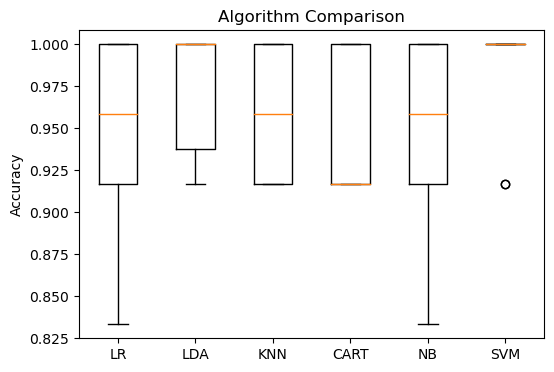

In [8]:
# 셀 8: 알고리즘 비교 시각화
plt.figure(figsize=(6,4))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()


모델별 성능 분포(분산, 이상치) 직관적으로 비교

In [9]:
# 셀 9: 최종 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 최적 모델(SVM) 학습 및 예측
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

# 성능 지표 출력
print("Accuracy :", accuracy_score(y_validation, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_validation, predictions))
print("\nClassification Report:\n", classification_report(y_validation, predictions))


Accuracy : 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

